# Individual Household Electric Power Consumption
## Data Processing 

In [1]:
import pandas as pd 
df = pd.read_csv("household_power_consumption.csv")
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,12/16/06,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,12/16/06,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,12/16/06,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,12/16/06,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,12/16/06,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,12/13/08,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,12/13/08,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,12/13/08,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,12/13/08,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [2]:
df['Date']

0          12/16/06
1          12/16/06
2          12/16/06
3          12/16/06
4          12/16/06
             ...   
1048570    12/13/08
1048571    12/13/08
1048572    12/13/08
1048573    12/13/08
1048574    12/13/08
Name: Date, Length: 1048575, dtype: object

In [3]:
#subset data for year only 2008
import re
pattern=re.compile('[1-9]+.[1-9]+.\d[8]')
df['Date']=df['Date'].str.findall(pattern).str[0]
df['Date'].dropna()

547596       1/1/08
547597       1/1/08
547598       1/1/08
547599       1/1/08
547600       1/1/08
             ...   
1048570    12/13/08
1048571    12/13/08
1048572    12/13/08
1048573    12/13/08
1048574    12/13/08
Name: Date, Length: 413139, dtype: object

In [4]:
#drop nan values
data = df.dropna()
data


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
547596,1/1/08,0:00:00,1.62,0.07,241.25,6.6,0,0,18.0
547597,1/1/08,0:01:00,1.626,0.072,241.74,6.6,0,0,18.0
547598,1/1/08,0:02:00,1.622,0.072,241.52,6.6,0,0,18.0
547599,1/1/08,0:03:00,1.612,0.07,240.82,6.6,0,0,18.0
547600,1/1/08,0:04:00,1.612,0.07,240.8,6.6,0,0,18.0
...,...,...,...,...,...,...,...,...,...
1048570,12/13/08,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,12/13/08,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,12/13/08,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,12/13/08,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [5]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
data.describe()

,Sub_metering_3
count,413124.000000
mean,6.024109
std,8.200071
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,31.000000


In [7]:
data.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
data.shape

(413124, 9)

Dropped all the entities with missing data.

In [9]:
data['Sub_metering_3'].unique()

array([18., 17., 19.,  4.,  0.,  9., 16., 10.,  3., 11., 14., 12.,  8.,
       13., 20.,  6.,  1.,  2.,  7., 15.,  5., 26., 25., 21., 27., 28.,
       22., 23., 29., 24., 30., 31.])

In [10]:
data['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')
print(df['Sub_metering_3'].dtype)
print(df['Sub_metering_3'].unique())

float64
[17. 16. 18.  9.  0.  5. 19. 10. 20.  8.  4.  2.  3. 11. 13.  6. 15. nan
 12.  1. 14.  7. 23. 25. 26. 28. 27. 21. 22. 29. 24. 30. 31.]


/var/folders/05/p31y3z7n5bq94cb4mqy61k500000gn/T/ipykernel_27988/2626979325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')


In [11]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
new_df = data.drop(columns=["Date", "Time"])
new_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
547596,1.62,0.07,241.25,6.6,0,0,18.0
547597,1.626,0.072,241.74,6.6,0,0,18.0
547598,1.622,0.072,241.52,6.6,0,0,18.0
547599,1.612,0.07,240.82,6.6,0,0,18.0
547600,1.612,0.07,240.8,6.6,0,0,18.0
...,...,...,...,...,...,...,...
1048570,0.426,0.076,242.27,1.8,0,0,0.0
1048571,0.424,0.076,242.1,1.8,0,0,0.0
1048572,0.422,0.076,241.73,1.8,0,0,0.0
1048573,0.422,0.078,242.56,1.8,0,0,0.0


In [13]:
new_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## Model Selection and Implementation
### Linear Regression

In [15]:
X = new_df
y = new_df.Global_reactive_power
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(330499, 7) (330499,)
(82625, 7) (82625,)


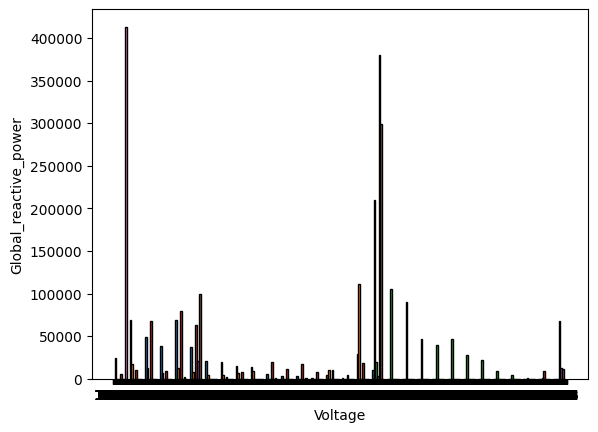

In [16]:
plt.hist(new_df, bins=30, edgecolor='black')
plt.xlabel('Voltage')
plt.ylabel('Global_reactive_power')
plt.show()

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('slope: ', model.coef_)
print('intercept: ', model.intercept_)

slope:  [ 7.19893477e-15  1.00000000e+00 -5.51375766e-17 -1.32533024e-15
 -1.51152406e-17  5.48348114e-17 -5.24548303e-17]
intercept:  1.1601830607332886e-14


In [18]:
#test regression
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2", r2)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE", MAE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE",MSE)

r2 1.0
MAE 1.2258108351969365e-15
MSE 3.0559799680443808e-30


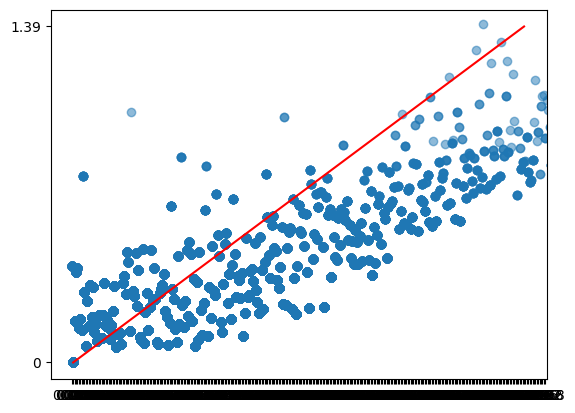

In [19]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")

## Evaluation 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


lr  = [0.01, 0.003, 0.001, 3e-4, 1e-4, 1e-5]
for k in lr:
    sgdr = SGDRegressor(eta0= k)
    sgdr.fit(X_train, y_train)
    y_test_pred = sgdr.predict(X_test)
    scores = cross_val_score(sgdr, X_train, y_train, cv=5, scoring='r2')
    print(scores.mean())

0.9999999205673366
0.9999998954377235
0.9999998689389983
0.9999995891003921
0.9999493390288551
0.5690185524139355


In [21]:
lr = 0.01
r2 = r2_score(y_test, y_test_pred)
print('r2', r2)
MAE = mean_absolute_error(y_test, y_test_pred)
print('MAE', MAE)
MSE = mean_squared_error(y_test, y_test_pred)
print('MSE', MSE)

r2 0.674009452019054
MAE 0.04820175827850842
MSE 0.003997470291506777


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
k_range = [2, 5, 10, 20, None]
k_scores = []
param_grid = {'max_depth': [2, 5, 10, 20, None]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20, None]})

In [23]:
from sklearn.metrics import accuracy_score
best_param = clf.best_estimator_
best_param.fit(X_train, y_train)
y_pred = best_param.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

Accuracy 0.9996732223903178
